Input image and its histogram


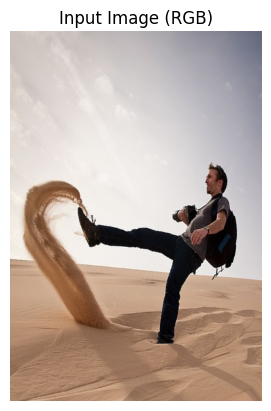

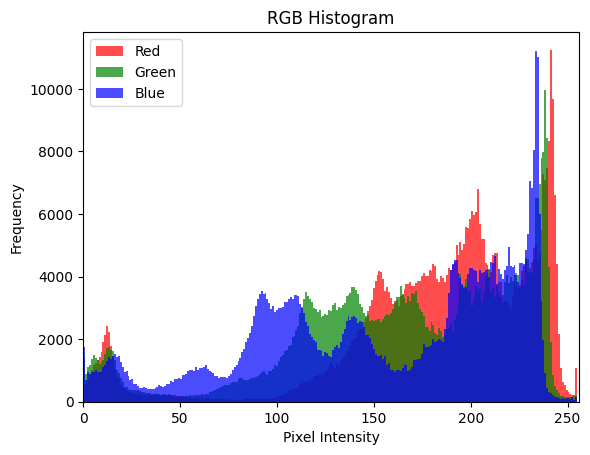

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Read the image
img = cv2.imread('/content/love_Desert_after homography.jpg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Input image and its histogram")

# Display the image
plt.imshow(img_rgb)
plt.title("Input Image (RGB)")
plt.axis('off')
plt.show()

# Calculate and display the histogram
hist, bins = np.histogram(img_rgb.flatten(), 256, [0, 256])
plt.figure()
plt.hist(img_rgb[:,:,0].flatten(), bins=256, color='red', alpha=0.7, label='Red')
plt.hist(img_rgb[:,:,1].flatten(), bins=256, color='green', alpha=0.7, label='Green')
plt.hist(img_rgb[:,:,2].flatten(), bins=256, color='blue', alpha=0.7, label='Blue')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('RGB Histogram')
plt.legend()
plt.show()

#Histogram equalization

Input image and its histogram


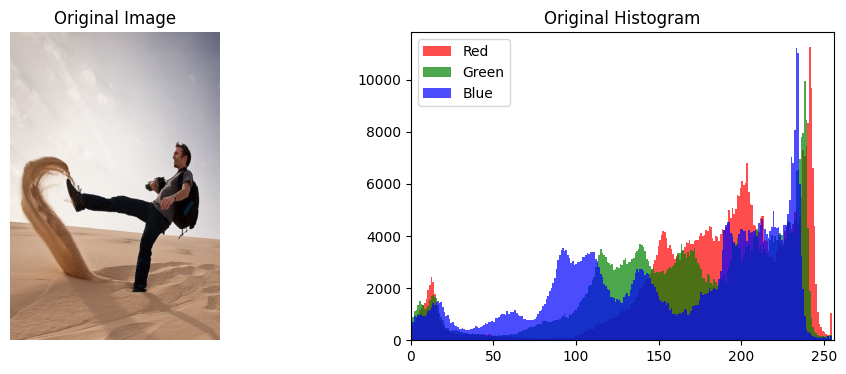

Output image and its histogram after histogram equalization


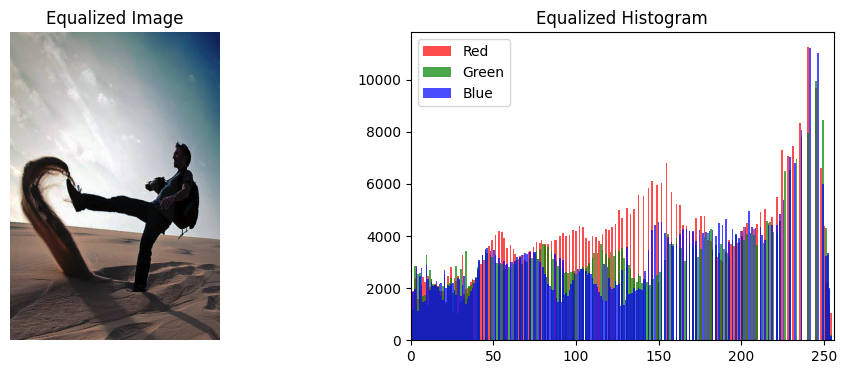

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_cumsum(arr):
    cumsum = [0] * len(arr)
    current_sum = 0
    for i in range(len(arr)):
        current_sum += arr[i]
        cumsum[i] = current_sum
    return cumsum

def manual_histogram(arr, bins=256, range=(0, 256)):
    hist = [0] * bins
    for pixel in arr.flatten():
        if range[0] <= pixel < range[1]:
            hist[pixel] += 1
    return hist, list(range[0:range[1]])

def histogram_equalization(img_in):
    # Convert RGB to BGR (OpenCV default)
    img_bgr = cv2.cvtColor(img_in, cv2.COLOR_RGB2BGR)

    # Split the channels
    b, g, r = cv2.split(img_bgr)

    # Calculate histogram for each channel
    h_b, _ = manual_histogram(b, 256, [0, 256])
    h_g, _ = manual_histogram(g, 256, [0, 256])
    h_r, _ = manual_histogram(r, 256, [0, 256])

    # Calculate cumulative sum for each channel
    cdf_b = manual_cumsum(h_b)
    cdf_g = manual_cumsum(h_g)
    cdf_r = manual_cumsum(h_r)

    # Mask all pixels with value=0 and normalize
    cdf_m_b = np.ma.masked_equal(cdf_b, 0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min()) * 255 / (cdf_m_b.max() - cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b, 0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g, 0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min()) * 255 / (cdf_m_g.max() - cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g, 0).astype('uint8')

    cdf_m_r = np.ma.masked_equal(cdf_r, 0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min()) * 255 / (cdf_m_r.max() - cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r, 0).astype('uint8')

    # Apply the equalization
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    # Merge the equalized channels
    img_out = cv2.merge((img_b, img_g, img_r))

    # Convert back to RGB
    img_out_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

    return img_out_rgb

# Example usage
img = cv2.imread('/content/love_Desert_after homography.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Input image and its histogram")

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# Display the original histogram
plt.subplot(122)
plt.hist(img_rgb[:,:,0].flatten(), bins=256, color='red', alpha=0.7, label='Red')
plt.hist(img_rgb[:,:,1].flatten(), bins=256, color='green', alpha=0.7, label='Green')
plt.hist(img_rgb[:,:,2].flatten(), bins=256, color='blue', alpha=0.7, label='Blue')
plt.xlim([0, 256])
plt.legend()
plt.title("Original Histogram")
plt.show()

# Apply histogram equalization
equalized_img = histogram_equalization(img_rgb)

print("Output image and its histogram after histogram equalization")

# Display the equalized image
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(equalized_img)
plt.title("Equalized Image")
plt.axis('off')

# Display the equalized histogram
plt.subplot(122)
plt.hist(equalized_img[:,:,0].flatten(), bins=256, color='red', alpha=0.7, label='Red')
plt.hist(equalized_img[:,:,1].flatten(), bins=256, color='green', alpha=0.7, label='Green')
plt.hist(equalized_img[:,:,2].flatten(), bins=256, color='blue', alpha=0.7, label='Blue')
plt.xlim([0, 256])
plt.legend()
plt.title("Equalized Histogram")
plt.show()

# Gamma correction

Original image and its histogram


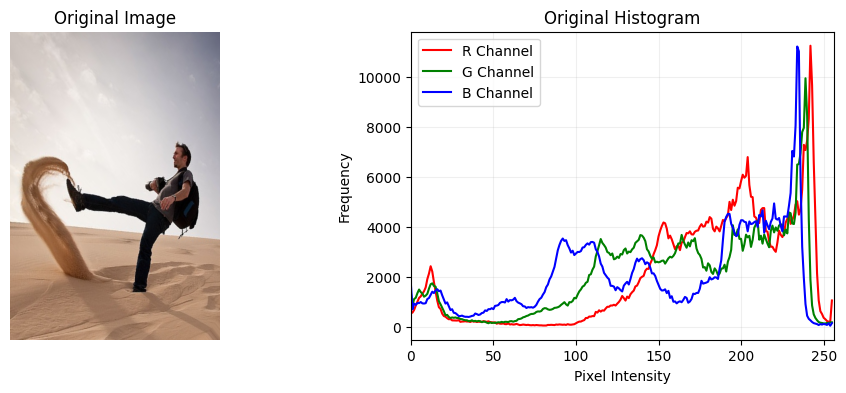


Gamma corrected image (gamma=0.1) and its histogram


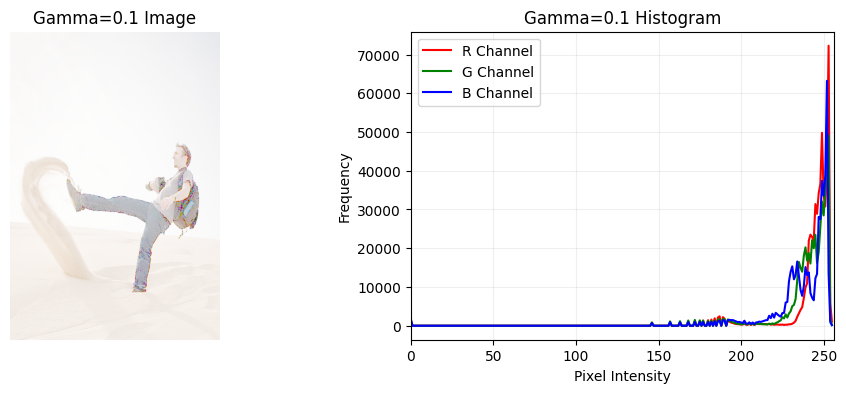


Gamma corrected image (gamma=0.5) and its histogram


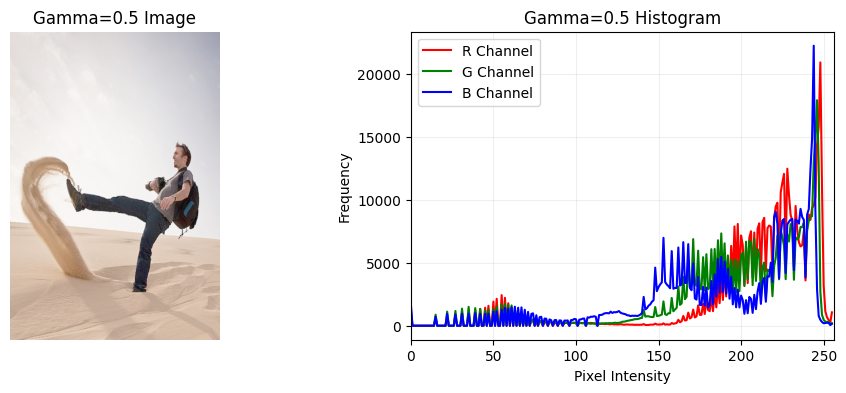


Gamma corrected image (gamma=2.0) and its histogram


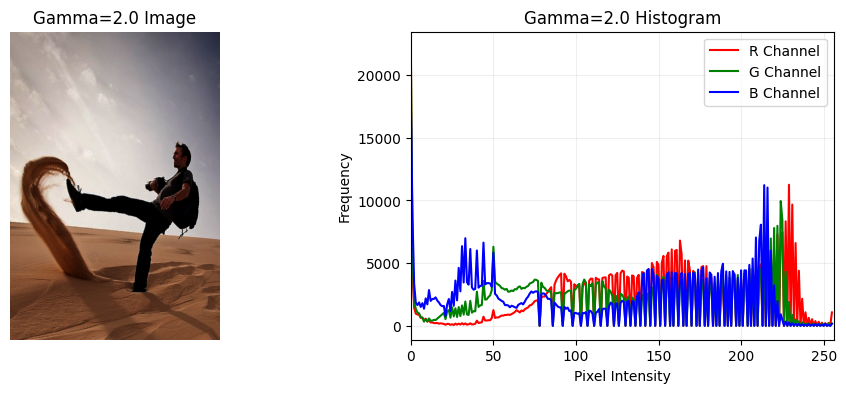


Gamma corrected image (gamma=3.0) and its histogram


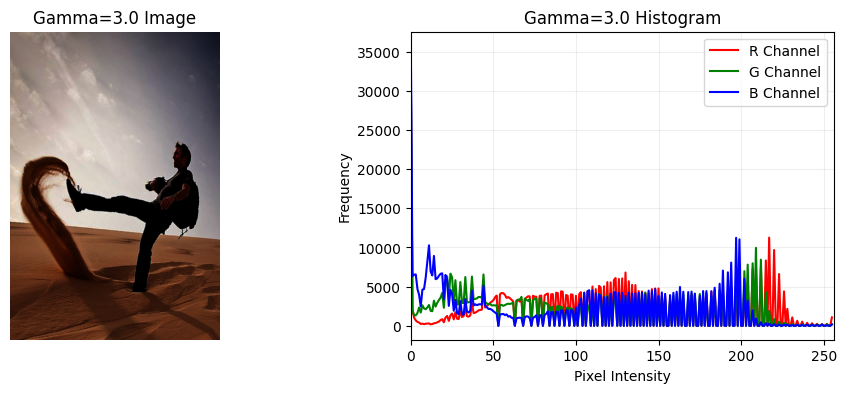

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_histogram(arr, bins=256, range=(0, 256)):
    hist = [0] * bins
    for pixel in arr.flatten():
        if range[0] <= pixel < range[1]:
            hist[pixel] += 1
    return hist, list(range[0:range[1]])

def plot_rgb_histogram(img_rgb, title=""):
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title(f"{title} Image")
    plt.axis('off')

    # Plot the histogram

    plt.subplot(122)
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist, _ = manual_histogram(img_rgb[:,:,i], 256, [0, 256])
        plt.plot(hist, color=color, label=f'{color.upper()} Channel')

    plt.title(f"{title} Histogram")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.show()

def gamma_correction(img_rgb, gamma):
    # Create gamma correction lookup table
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Apply gamma correction to each channel
    corrected_rgb = np.zeros_like(img_rgb)
    for i in range(3):
        corrected_rgb[:,:,i] = table[img_rgb[:,:,i]]

    return corrected_rgb

# Example usage
img = cv2.imread('/content/love_Desert_after homography.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original image and its histogram
print("Original image and its histogram")
plot_rgb_histogram(img_rgb, "Original")

# Try different gamma values
gamma_values = [0.1, 0.5, 2.0, 3.0]
for gamma in gamma_values:
    print(f"\nGamma corrected image (gamma={gamma}) and its histogram")
    corrected_img = gamma_correction(img_rgb, gamma)
    plot_rgb_histogram(corrected_img, f"Gamma={gamma}")

#Log transformation

Original image and its histogram


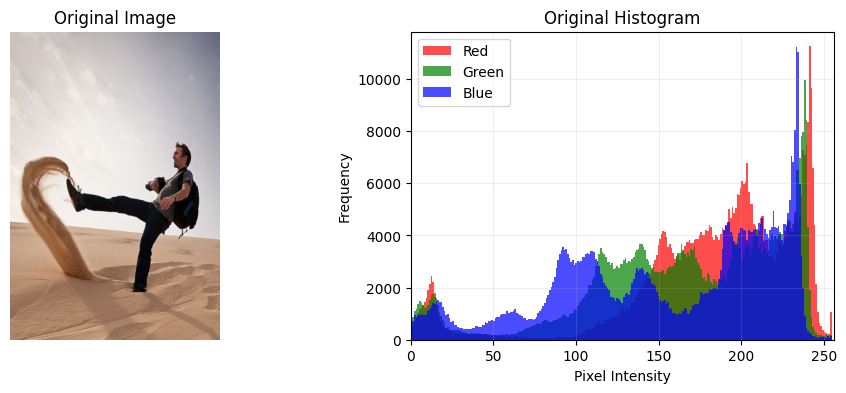

Log transformed image and its histogram


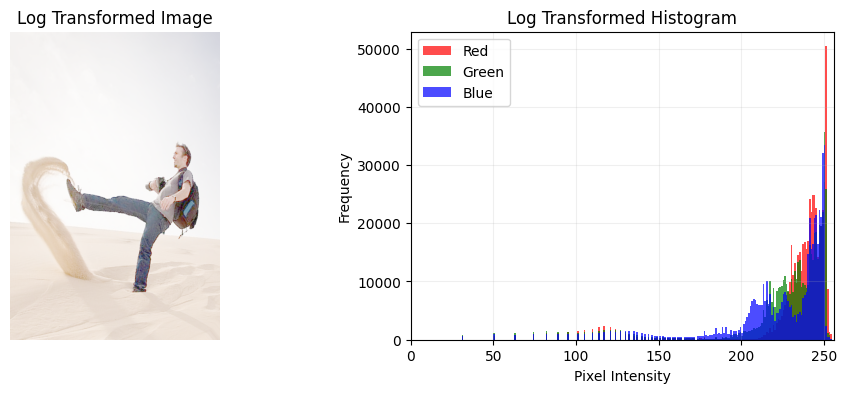

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_histogram(arr, bins=256, range=(0, 256)):
    hist = [0] * bins
    for pixel in arr.flatten():
        if range[0] <= pixel < range[1]:
            hist[pixel] += 1
    return hist, list(range[0:range[1]])

def plot_rgb_histogram(img_rgb, title=""):
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title(f"{title} Image")
    plt.axis('off')

    # Plot the histogram
    plt.subplot(122)
    colors = ('red', 'green', 'blue')
    for i, color in enumerate(colors):
        hist, _ = manual_histogram(img_rgb[:,:,i], 256, [0, 256])
        plt.hist(range(256), bins=256, weights=hist, color=color, alpha=0.7, label=f'{color.capitalize()}')

    plt.title(f"{title} Histogram")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.show()

def log_transformation(img_rgb):
    # Convert the image to float32 for processing
    img_float = img_rgb.astype(np.float32)

    # Prepare an output image of the same shape
    img_log = np.zeros_like(img_float)

    # Apply log transformation to each channel
    for i in range(img_float.shape[2]):
        c = 255 / np.log(1 + np.max(img_float[:, :, i]))  # Scaling constant for each channel
        img_log[:, :, i] = c * np.log(1 + img_float[:, :, i])

    # Convert back to uint8
    img_log = np.array(img_log, dtype=np.uint8)

    return img_log

# Example usage
img = cv2.imread('/content/love_Desert_after homography.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Original image and its histogram")
plot_rgb_histogram(img_rgb, "Original")

# Apply log transformation
log_transformed_img = log_transformation(img_rgb)

print("Log transformed image and its histogram")
plot_rgb_histogram(log_transformed_img, "Log Transformed")

#Contrast stretching

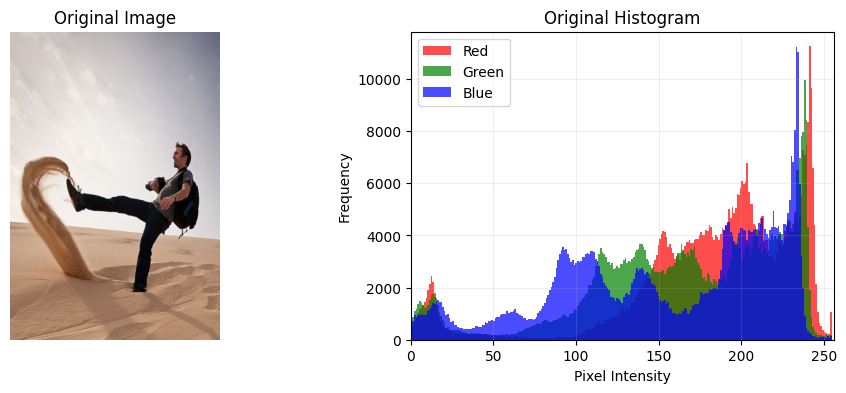

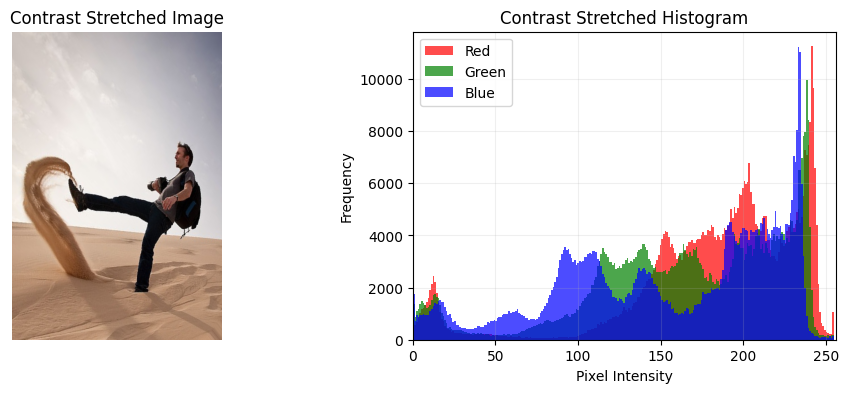

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_clip(arr, min_val, max_val):
    clipped = arr.copy()
    if arr.ndim == 2:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                if clipped[i, j] < min_val:
                    clipped[i, j] = min_val
                elif clipped[i, j] > max_val:
                    clipped[i, j] = max_val
    elif arr.ndim == 3:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                for k in range(arr.shape[2]):
                    if clipped[i, j, k] < min_val:
                        clipped[i, j, k] = min_val
                    elif clipped[i, j, k] > max_val:
                        clipped[i, j, k] = max_val
    return clipped

def contrast_stretching(img_in):
    img_float = img_in.astype(np.float32)
    min_pixel = np.min(img_float)
    max_pixel = np.max(img_float)
    img_stretched = (img_float - min_pixel) / (max_pixel - min_pixel) * 255
    return manual_clip(img_stretched, 0, 255).astype(np.uint8)

def manual_histogram(img, bins, range_vals):
    hist = np.zeros(bins)
    for val in img.ravel():
        if range_vals[0] <= val < range_vals[1]:
            hist[int((val - range_vals[0]) / (range_vals[1] - range_vals[0]) * bins)] += 1
    return hist, None

def plot_rgb_histogram(img_rgb, title=""):
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title(f"{title} Image")
    plt.axis('off')

    # Plot the histogram
    plt.subplot(122)
    colors = ('red', 'green', 'blue')
    for i, color in enumerate(colors):
        hist, _ = manual_histogram(img_rgb[:,:,i], 256, [0, 256])
        plt.hist(range(256), bins=256, weights=hist, color=color, alpha=0.7, label=f'{color.capitalize()}')

    plt.title(f"{title} Histogram")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.show()

# Load the image
img = cv2.imread('/content/love_Desert_after homography.jpg')

if img is None:
    raise Exception("Image not found!")

# Show original image and histogram
plot_rgb_histogram(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "Original")

# Apply contrast stretching
stretched_img = contrast_stretching(img)

# Show contrast-stretched image and histogram
plot_rgb_histogram(cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB), "Contrast Stretched")


#Adaptive Gamma Correction

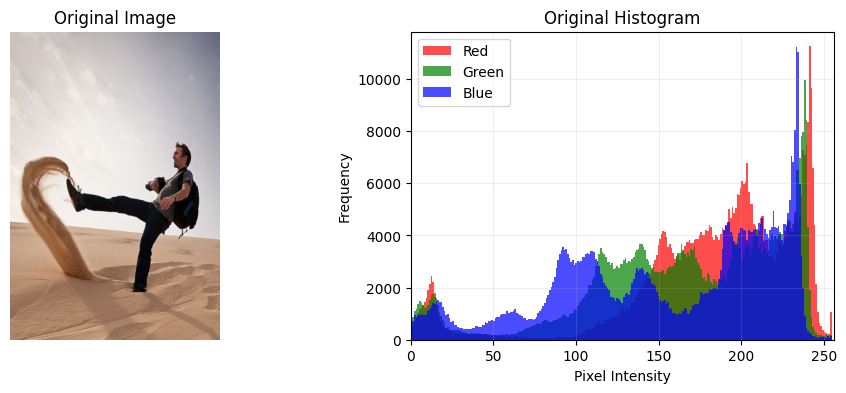

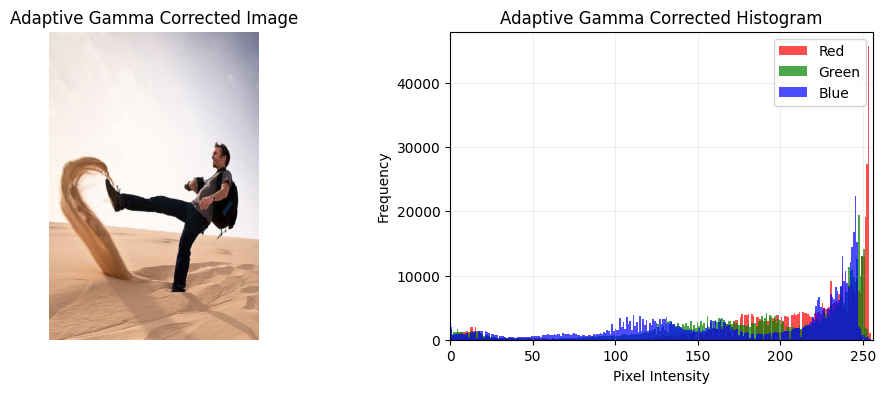

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_cumsum(arr):
    cumsum = [0] * len(arr)
    current_sum = 0
    for i in range(len(arr)):
        current_sum += arr[i]
        cumsum[i] = current_sum
    return cumsum

def manual_histogram(img, bins, range_vals):
    hist = np.zeros(bins)
    for val in img.ravel():
        if range_vals[0] <= val < range_vals[1]:
            hist[int((val - range_vals[0]) / (range_vals[1] - range_vals[0]) * bins)] += 1
    return hist, None

def plot_rgb_histogram(img_rgb, title=""):
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title(f"{title} Image")
    plt.axis('off')

    # Plot the histogram
    plt.subplot(122)
    colors = ('red', 'green', 'blue')
    for i, color in enumerate(colors):
        hist, _ = manual_histogram(img_rgb[:,:,i], 256, [0, 256])
        plt.hist(range(256), bins=256, weights=hist, color=color, alpha=0.7, label=f'{color.capitalize()}')

    plt.title(f"{title} Histogram")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.show()

def adaptive_gamma_correction(img, alpha=0.5):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    v_channel = hsv[:, :, 2]
    hist, _ = np.histogram(v_channel.flatten(), bins=256, range=[0, 256])
    pdf = hist / hist.sum()
    pdf_min, pdf_max = pdf.min(), pdf.max()
    pdf_weighted = pdf_max * ((pdf - pdf_min) / (pdf_max - pdf_min))**alpha
    pdf_weighted = np.clip(pdf_weighted, 0, 1)
    cdf_weighted = manual_cumsum(pdf_weighted)
    cdf_weighted = [x / cdf_weighted[-1] for x in cdf_weighted]
    gamma_values = [1 - x for x in cdf_weighted]
    lut = np.array([((i / 255.0) ** gamma_values[i]) * 255 for i in range(256)]).astype("uint8")
    enhanced_v = cv2.LUT(v_channel, lut)
    hsv[:, :, 2] = enhanced_v
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Load the image
img = cv2.imread('/content/love_Desert_after homography.jpg')

if img is None:
    raise Exception("Image not found!")

# Show original image and histogram
plot_rgb_histogram(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "Original")

# Apply adaptive gamma correction
enhanced_img = adaptive_gamma_correction(img)

# Show gamma-corrected image and histogram
plot_rgb_histogram(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB), "Adaptive Gamma Corrected")


In [ ]:
cv2.imwrite('love_desert_enhanced.jpg', enhanced_image)

True